With Constant Step Size

MDP with 10 states and 2 actions
discounting factor gamma = 0.95, step size alpha = 0.01

Running  200000 iterations

The Policy is (state,action) = probability
(0,0) = 0.4835164835164835   (0,1) = 0.5164835164835165   
(1,0) = 0.48854961832061067   (1,1) = 0.5114503816793893   
(2,0) = 0.881578947368421   (2,1) = 0.11842105263157894   
(3,0) = 0.7980769230769231   (3,1) = 0.20192307692307693   
(4,0) = 0.2926829268292683   (4,1) = 0.7073170731707317   
(5,0) = 0.4430379746835443   (5,1) = 0.5569620253164557   
(6,0) = 0.88   (6,1) = 0.12   
(7,0) = 0.4715447154471545   (7,1) = 0.5284552845528455   
(8,0) = 0.30952380952380953   (8,1) = 0.6904761904761905   
(9,0) = 0.34328358208955223   (9,1) = 0.6567164179104478   


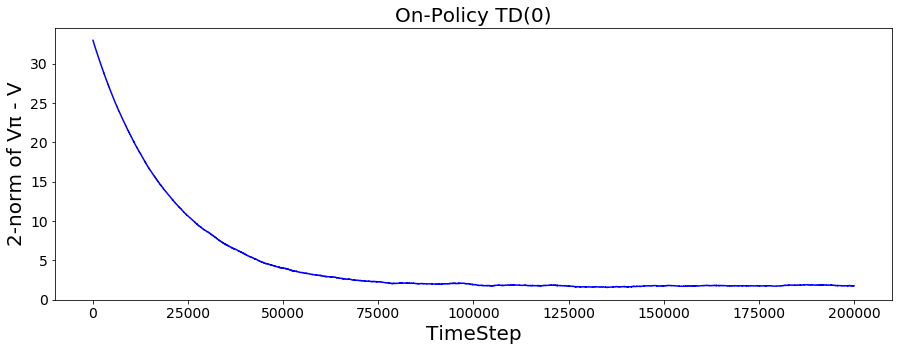

Value Function:   [10.29437056 10.08806842  9.87819535  9.94357563  9.97493432  9.80752773
  9.61597325 10.07928934  9.80303142  9.87738178]
Minimum Delta:   1.559454121773413



With Diminishing Step Size
MDP with 10 states and 2 actions
discounting factor gamma = 0.95, step size alpha = 0.0014142149765887788

Running  500000 iterations

The Policy is (state,action) = probability
(0,0) = 0.4835164835164835   (0,1) = 0.5164835164835165   
(1,0) = 0.48854961832061067   (1,1) = 0.5114503816793893   
(2,0) = 0.881578947368421   (2,1) = 0.11842105263157894   
(3,0) = 0.7980769230769231   (3,1) = 0.20192307692307693   
(4,0) = 0.2926829268292683   (4,1) = 0.7073170731707317   
(5,0) = 0.4430379746835443   (5,1) = 0.5569620253164557   
(6,0) = 0.88   (6,1) = 0.12   
(7,0) = 0.4715447154471545   (7,1) = 0.5284552845528455   
(8,0) = 0.30952380952380953   (8,1) = 0.6904761904761905   
(9,0) = 0.34328358208955223   (9,1) = 0.6567164179104478   


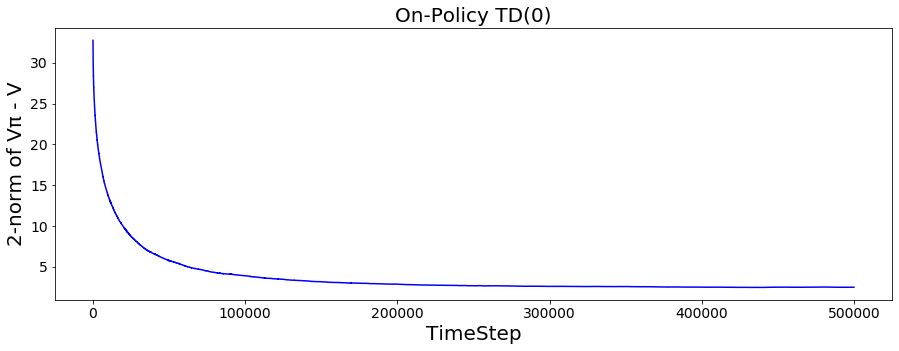

Value Function:   [9.6096115  9.70361607 9.70347832 9.54264488 9.67382934 9.59714318
 9.59866633 9.89235712 9.59092641 9.70416368]
Minimum Delta:   2.4556833027315483


In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import mdptoolbox.example


class TDLearner:
    """
    Class that will ues on policy temporal difference
    prediction to solve the model free problem with a given policy

    """

    def __init__(self, policy, states, actions, alpha=0.01, gamma=0.95, beta = 0.5, diminish = None, iterations = 100000, v_pi = [10.3269891,10.28997413, 10.61215495, 10.47182536, 10.53804012, 10.44741659, 10.58984017, 10.28781177, 10.42280426, 10.27326007]):
        #action value function, mapping each state action pair
        #initialized to have 0 for every new state action pair
        self.value_function = np.zeros(states)

        #discount rate between [0,1]
        self.gamma = gamma

        #step size between [0,1]
        self.alpha = alpha

        #the mapping of states to actions
        self.policy = policy

        #the amount of states
        self.states = states
        #the amount of actions
        self.actions = actions
        
        #the state state S
        self.state_space = np.arange(0,self.states)
        
        #the action space A
        self.action_space = np.arange(0,self.actions)

        #transition probability matrix P, with shape AxSxS'
        self.transitionProbabilities, self.rewardMatrix = mdptoolbox.example.rand(states,actions)
        
        #the reward matrix 
        self.rewardMatrix = np.random.rand(self.actions,self.states, self.states)
        
        #the transition probability matrix based under the policy
        self.probabilityMatrix =  np.zeros((self.states,self.states))

        #equal the diminish function if diminishing step size and will use beta
        self.diminish = diminish
        self.step_size = self.alpha
        self.beta = beta
        
        #for debugging purposes will keep count of how many times each state was visited
        self.exploringStates = defaultdict(int)
        #the number of iterations to run the program for
        self.iterations = iterations
        #array length of iterations that will keep track of the difference between v_pi and value_function
        self.norm_difference = []
        
        #solved through value iteration will be used to debug and find convergence
        self.v_pi = v_pi
        
        
    def setVpi(self,v_pi):
        """
        Set the estimated v_pi to what you found
        Must be called before running the environment
        Default reward matrix is set to what was found in value iteration
        
        For this to work
        :param v_pi: estimated v_pi, needs to be in length of state space S
        :returns: void
        """
        self.v_pi = v_pi 
        
    def setRewardMatrix(self,matrix):
        """
        Change the reward matrix to whatever you want with this function
        Must be called before running the environment
        Default reward matrix is set to random values between [0,1]
        
        For this to work
        Matrix needs to be in shape AxSxS
        A is the Action space
        S is the State space
        """
        self.rewardMatrix = matrix
        
    def createProbabilityMatrix(self):
        
        #to run TD, the transition probability matrix has to be under the policy 
        #taking the sum of the probabilities of taking that action a under state s and multiplying that by the transition probability value 
        
    
        for s in range(self.states):
            probabilities = np.zeros(self.states)
            for a in range(self.actions):
                    action_prob = self.policy[s][a]
                    probabilities += self.transitionProbabilities[a][s]*action_prob
            self.probabilityMatrix[s] = probabilities
            

    def getNextState(self, state, action):
        
        """
        Just return the next state based on the transition probability matrix and the action taken
        Using random choice that will use a distribution to give a state
        :param state: observation that was previously seen
        :param action: action that was take
        :return: next state that the agent will go to 
        """
            
        next_state = np.random.choice(self.state_space,1,p = self.probabilityMatrix[state])
        return next_state[0]


    def getValue(self,state):
        """
        Just return the value of the state action pair given the current estimate of the environment
        :param state: observation that was previously seen
        :param action: action that was take
        :return: the value of that state action pair
        """

        return self.value_function[state]

    def updateValueFunction(self,state, next_state,reward):
        """
        Update the action value function based on the
        :param state: previous state
        :param action: action taken at state
        :param next_state: next state the agent is planning on going ot
        :param next_action: if agent were at next_state the action the agent is planning on taking
        :param reward: the reward it received at state taking action
        :return: void,will change the q_function in the class

        using the on policy temporal difference formula
        next action is chose greedily
        V(s) = V(s) + α[R + γV(s') - V(s)]
        """
        self.value_function[state] = self.getValue(state) + \
                                         self.step_size*(reward + self.gamma*(self.getValue(next_state))-self.getValue(state))


    
    def chooseAction(self, state):
        """
        Using the current state and the given policy find the action  using random choice based on the probabilities
        """
        
        p = []
        for action,prob in sorted(self.policy[state].items()):
            p.append(prob)
            
        action = np.random.choice(self.action_space, 1, p = p)
        
        return action[0] 
    
    def takeAction(self, state, action):
        """
        perform the action given to find the next position in the MDP
        returns the next state and the reward from that transition
        """
        next_state = self.getNextState(state,action)
        reward = self.rewardMatrix[action][state][next_state]
        
        return next_state, reward
    
    
    def runEnvironment(self):
        """
        Will run the OpenGym AI environment set using on policy Temporal Difference Learning

        :param episodes: the number of episodes you would like to make the enviornment play
        :param maxtimesteps:
        :return: void

        """
        
        """
        Rough Estimate of the Value Function Limit
        [10.32698916 10.28997413 10.61215495 10.47182536 10.53804012 10.44741659
         10.58984017 10.28781177 10.42280426 10.27326007]
        """
        
        
    
        
        #create the transition probability matrix given the policy pi
        self.createProbabilityMatrix()
        
        for t in range(self.iterations):

            totalReward = 0

            state = np.random.randint(0,self.states)

                
            if self.diminish!=None and self.step_size>=0.001 and t>0:
                self.step_size = self.diminish(self.alpha, t, self.beta)

            #choose the action to take
            action = self.chooseAction(state)

            # take the action into course
            next_state, reward = self.takeAction(state,action)
            self.exploringStates[next_state]+=1


            # update the Q function with the new value
            self.updateValueFunction(state,next_state, reward)

            # move on to the next state and action pair
            state = next_state
            totalReward += reward

        #take the 2-norm of the difference between v_pi and v to plot
        self.norm_difference.append(np.linalg.norm(self.v_pi-self.value_function))

        
        
    def plot(self):
        """
        Will plot the 2-norm difference found and more information on the results
        For debugging purposes
        """
        
        #information on the MDP
        print(f"MDP with {self.states} states and {self.actions} actions\ndiscounting factor gamma = {self.gamma}, step size alpha = {self.step_size}\n")
        print("Running ", self.iterations, "iterations")
        
        #reference to the policy
        print("\nThe Policy is (state,action) = probability")
        for s in range(self.states):
            for a in range(self.actions):
                print(f"({s},{a}) = {self.policy[s][a]}  ",end=" ")
            print()
                      
        
        #plot the 2-norm difference
        plt.figure(figsize=(20,5))
        plt.plot(range(self.iterations), self.norm_difference, 'b-')
        plt.title("On-Policy TD(0)",fontsize = 20)
        plt.xlabel("TimeStep",fontsize = 20)
        plt.ylabel("2-norm of Vπ - V", fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.show()
        
        #information on the value function
        print("Value Function:  ", self.value_function)
        print("Minimum Delta:  ", min(self.norm_difference))

  

if __name__ == '__main__':
    """
    The Main Function to Run your program
    Example code given below
    All hyperparameters can be adjusted to your liking
    
    
    Policy must be given  
    the policy will be in the format of 
    (state,action) = Probability
    
    in python code it will be a dictionary inside of a dictionary
    {state: {action: probability of that action, action: probabiity, ... } state:{...}}
    """

    np.random.seed(0)
    policy = {}
    states = 10
    actions = 2
    for s in range(states):
        probs = np.random.randint(100,size = actions)
        probs = probs/np.sum(probs)
        policy[s] = dict()
        for a in range(actions):
            policy[s][a] = probs[a]

            
    print("With Constant Step Size\n")
    learner = TDLearner(policy=policy,states = states, actions = actions, iterations = 200000)
    learner.runEnvironment()
    learner.plot()
    
    
    print("\n\n\nWith Diminishing Step Size")
    learner = TDLearner(policy=policy,states = states, actions = actions, diminish = lambda a,k,b: a/(k**b),iterations = 500000,alpha = 1)
    learner.runEnvironment()
    learner.plot()


